# Importamos las librerías necesarias


Importamos numpy para los cálculos y matplotlib para los gráficos de la trayectoria del lanzamiento del satélite


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Párametros iniciales

Ahora definimos los parámetros iniciales, le damos al usuario la opción de poder ingresar los párametros del satélite que desee simular su trayectoria, sin embargo, algunos párametros ya están establecido debido a que son constantes necesarias para nuestra simulación (en el caso de la masa y radio de la tierra) suponiendo que el satélite que vamos a lanzar será para orbitar únicamente la tierra.

Tenemos masa del objeto, altitud que destacamos qué es dependiendo del objetivo del satélite, en el caso de que sea una simulación de órbita baja será apróx en una altitud de 160 a 2000 km sobre la superficie de la tierra, y en el caso de las órbitas geoestacionarias será sobre los 35,786 km sobre el ecuador terrestre, todo sí tendrá que ser ingresado en metros, luego tenemos la velocidad del objeto que será impulsado, constante gravitacional, masa de la tierra, radio de la tierra, el tiempo de simulación, es decir, el tiempo que queremos simular la trayectoria, y cada cuántos segundos queremos información.

In [51]:
M = float(input("Masa del objeto:")) #Establecemos la masa del objeto a lanzar en kg
H = float(input("Altitud:")) #Establecemos la altitud que queremos que orbite, sea órbita baja u orbita geoestacionaria en Metros
V = float(input("Velocidad inicial del objeto:")) #Establecemos la velocidad inicial del objeto, dependiendo en su orbita sea baja o geoestacionaria. (metros por segundos)
CG = 6.67430**-11 #Constante gravitacional
MT = 5.972**24 #Masa de la tierra (kg)
RT = 6371000 #Radio de la tierra (metros)
ts = float(input("Tiempo de simulación:")) #Establecemos el tiempo de simulación que queremos en segundos.
t = float(input("Cada cuántos segundos:")) #Establecemos cada cuántos segundos queremos que sea medido.



Masa del objeto:80
Altitud:35000000
Velocidad inicial del objeto:0
Tiempo de simulación:86400
Cada cuántos segundos:1


# Desarrollo del código para la simulación


definimos una función como atmosfera, ya que, calcular la densidad de la atmosfera es clave para saber dónde queremos que nuestro satélite orbite, tenemos en cuenta que la densidad aproximada del aire sobre el nivel del mar es 1.225 kg/m^3, también saber que mientras mayor sea la altitud, menor será la densidad, por ende se utiliza una formula para saber la densidad en ese instante de altitud, le preguntamos al usuario cuál quiere que sea la escala para la disminución de la densidad, si la escala es grande la densidad disminuira lentamente y si la escala es pequeña, disminuirá rápidamente, por eso se usa normalmente valores grandes.

In [52]:
densidad_inicial = 1.225 #Densidad del aire aprox
dism_altitud = float(input("cuál es la escala que desea para la disminución de densidad en metros:"))

def atmosfera(H):
    densidad = densidad_inicial * np.exp((-H / dism_altitud)) #Formula de la densidad en ese instate de la altitud
    return densidad


cuál es la escala que desea para la disminución de densidad en metros:5000


Luego, definimos la fuerza gravitacional que tiene el satélite, dependiendo de la altura total con la formula de la ley de la gravitación universal.

In [53]:
def gravedad(M,H):
  altura_total_t=RT + H #Sumamos la altitud con el radio de la tierra para saber el total de la altura.
  fuerza_grav= (CG*M*MT)/altura_total_t**2 #fórmula de la ley de gravitación universal.
  return fuerza_grav


Una vez ya teniendo la fuerza gravitacional que tiene el satélite y la densidad, se puede dar paso a el código para la simulación

In [54]:
def simulacion_satelite(M, V, ts, t): #Definimos la función con los parámetros que pedimos.
    tiempo = np.arange(0, ts, t)   #Pedimos un arreglo que empiece desde 0 hasta el tiempo de simulación con el intervalo de cada cuántos segundos queremos medirlo.
    altitud = np.zeros_like(tiempo) #Se hace un arreglo con 0, para guardar la información con la misma estructura del tiempo
    velocidad = np.zeros_like(tiempo) #Es lo mismo que la altitud

    for i, T in enumerate(tiempo[1:]):  # Comenzamos desde 1
        altitud[i] = altitud[i-1] + velocidad[i-1] * t if i > 0 else 0 #Altitud en base al tiempo
        densidad = atmosfera(altitud[i]) # Se obtiene la densidad atmosférica en ese instante.
        fuerza_gravitacional = gravedad(M, altitud[i]) #Se obtiene la fuerza gravitacional en esa altitud
        ac_grav = fuerza_gravitacional / M #Se calcula la aceleración gravitacional.
        ac_total = ac_grav
        velocidad[i] = velocidad[i-1] + ac_total * t #Se obtiene la velocidad en ese instante.

    return tiempo, altitud, velocidad

A continuación hacemos los gráficos para observar la simulación de la trayectoria del satélite en ese instante de tiempo.

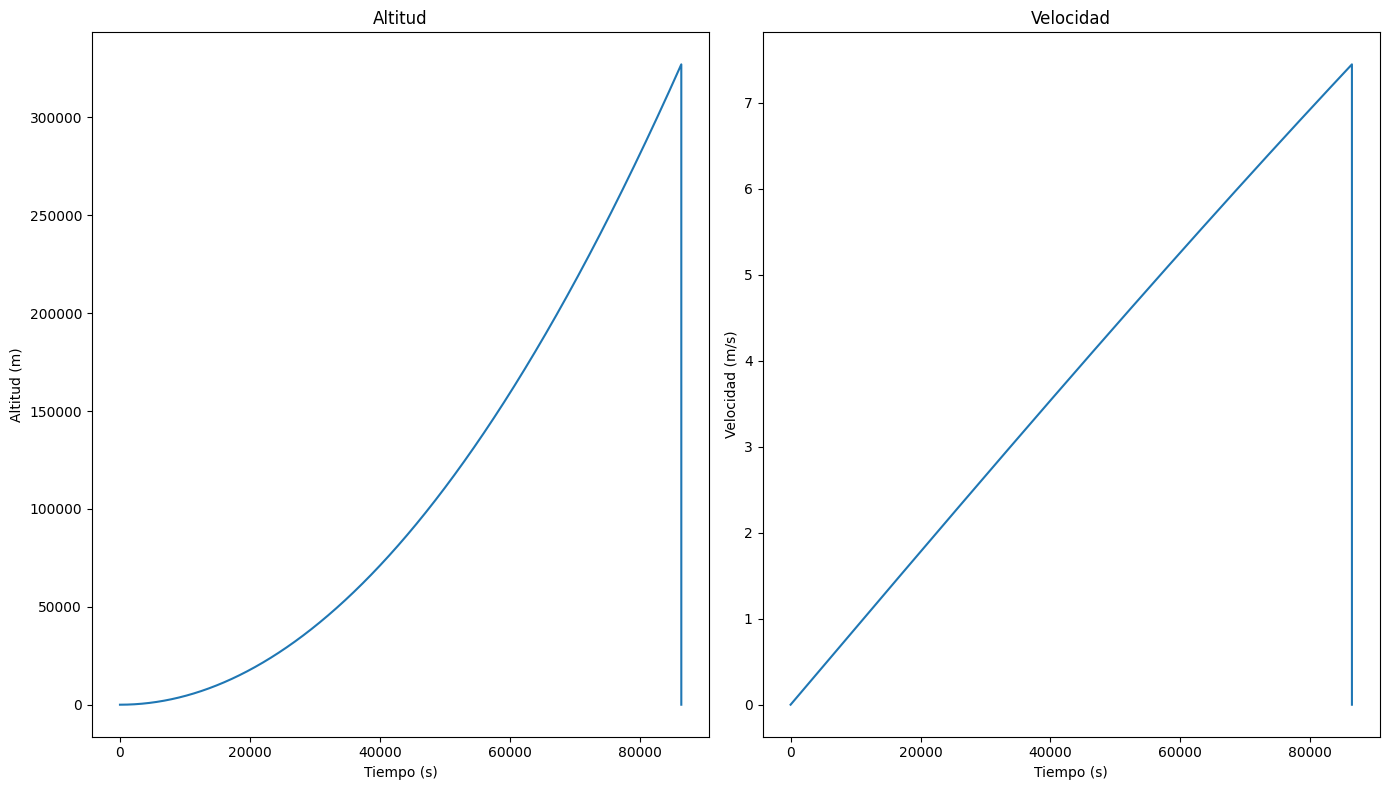

In [55]:
tiempo, altitud, velocidad = simulacion_satelite(M, V, ts, t)

# Gráficos
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.plot(tiempo, altitud)
plt.title("Altitud")
plt.xlabel("Tiempo (s)")
plt.ylabel("Altitud (m)")

plt.subplot(1, 2, 2)
plt.plot(tiempo, velocidad)
plt.title("Velocidad")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")

plt.tight_layout()
plt.show()